<a href="https://colab.research.google.com/github/Malikumair786/Machine_Learning/blob/main/Project5_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Wrokflow:**

Data --> Data pre-processing --> train_test_split --> SVM ML algorithm --> Trained Support Vector Machine Model --> New Data --> Eligible or not eligible


Importing the dependencies

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and processing

In [26]:
# Loading the dataset to a pandas dataframe
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')


In [27]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [29]:
loan_dataset.shape

(614, 13)

The purpose of choosing the SVM model is that they work well with small ampunt of data where the problem is binary classification.

In [30]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Now deals with the missing values in each column

In [32]:
#We have to use the dropping method for handling with missing values
loan_dataset = loan_dataset.dropna()

In [33]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
loan_dataset.shape

(480, 13)

In [35]:
# Label Encoding
#dictionary DataType
#n--0, Y-->1
loan_dataset.replace({'Loan_Status':{'N':0, 'Y': 1}}, inplace = True)

In [36]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [37]:
# Dependents Column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [38]:
#Replace All the 3+ value with 4
loan_dataset = loan_dataset.replace(to_replace = '3+', value = 4)

In [39]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

In [40]:

correlation = loan_dataset.corr()
print (correlation)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   
Loan_Status              -0.043152          -0.049020   -0.071753   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.010838       -0.056152    -0.043152  
CoapplicantIncome         -0.005775       -0.008692    -0.049020  
LoanAmount                 0.050867       -0.040773    -0.071753  
Loan_Amount_Term           1.000000        0.032937    -0.007798  
Credit_History             0.032937        1.000000     0.529390  
Loan_Status               -0.007798        0.529390     1.000000  


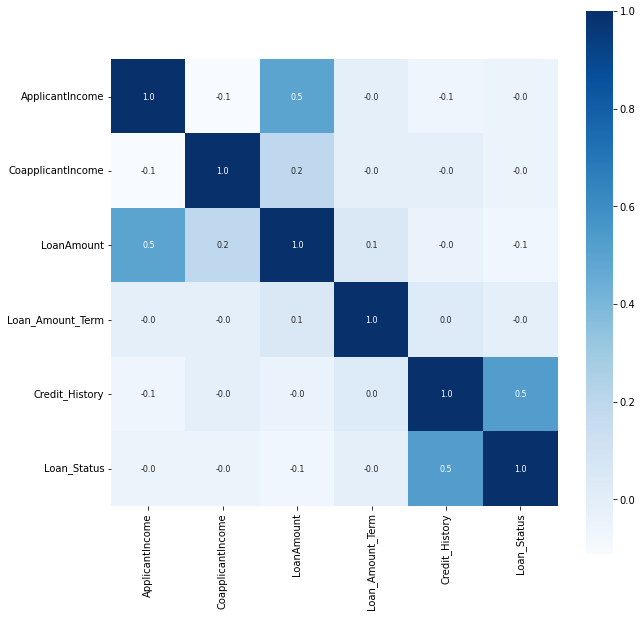

In [41]:

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt ='.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues' )


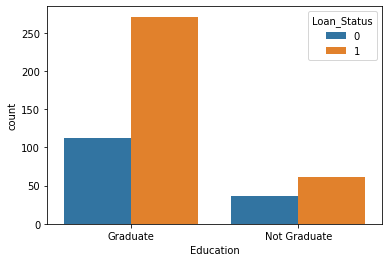

In [43]:
##Education and loan Status
sns.countplot(x ='Education', hue = 'Loan_Status', data = loan_dataset)

The loan is approved if the person is graduated as compared to non-graduated

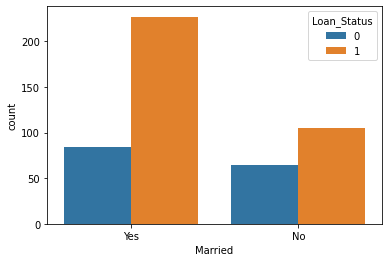

In [45]:
# marital Status and loan_status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_dataset)

If a person is married, the chances of loan is high as compared to non-maried

In [49]:
#Converting all the column which has text data to numerical value.
loan_dataset.replace({'Married'       :{'No':0, 'Yes': 1},
                     'Gender'         :{'Male':1, 'Female':0},
                     'Self_Employed' :{'No':0,'Yes':1},
                     'Property_Area'  :{'Rural':0,'Semiurban':1,'Urban':2},
                      'Education'     :{'Graduate':1,'Not Graduate': 0}},
                     inplace = True)

In [50]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [61]:
#seperating the data and the label
X = loan_dataset.drop(columns = ['Loan_ID','Loan_Status'], axis = 1)
Y = loan_dataset['Loan_Status']

In [62]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train_test Split

In [63]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 2)

In [64]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model

Support Vector Machine Model

In [65]:
classifier = svm.SVC(kernel = 'linear')


Training the support vector machine model

In [66]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [67]:
#accuracy score on train data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [68]:
print("Accuracy on training data : ",training_data_accuracy)

Accuracy on training data :  0.7986111111111112


In [69]:
#accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [70]:
print("Accuracy on test data : ",test_data_accuracy)

Accuracy on test data :  0.8333333333333334


Making a predictive system

In [79]:
input_data = (1,1,0,0,0,2583,2358,120,360,1,1)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for only one instance
#if we cannot reshape, the model will expect 768 data points, but we have to give on;y one, So we have to use the reshape function
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = classifier.predict(input_data_reshaped)
print(prediction)


if(prediction[0] == 0):
  print("The Loan Status is not approved")
else:
  print("The person is approved")

[1]
The person is approved


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [80]:
input_data = (1,1,4,1,0,3036,2504,158,360,0,1)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for only one instance
#if we cannot reshape, the model will expect 768 data points, but we have to give on;y one, So we have to use the reshape function
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = classifier.predict(input_data_reshaped)
print(prediction)


if(prediction[0] == 0):
  print("The Loan Status is not approved")
else:
  print("The person is approved")

[0]
The Loan Status is not approved


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
